# Exploracion datos ICFES

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Carga de Datos

In [27]:
df = pd.read_csv('Pacifico_cleaned.csv')

In [28]:
# Contar el número de observaciones (filas)
num_observations = len(df)

# Mostrar el resultado
print(f"El numero de observaciones es: {num_observations}")

El numero de observaciones es: 237382


In [29]:
col = df.columns
col

Index(['periodo', 'estu_consecutivo', 'cole_area_ubicacion', 'cole_calendario',
       'cole_naturaleza', 'estu_genero', 'fami_cuartoshogar',
       'fami_estratovivienda', 'fami_personashogar', 'fami_tieneautomovil',
       'fami_tienecomputador', 'fami_tieneinternet', 'fami_tienelavadora',
       'punt_ingles', 'punt_matematicas', 'punt_sociales_ciudadanas',
       'punt_c_naturales', 'punt_lectura_critica', 'punt_global', 'edad',
       'caracter_ACADÉMICO', 'caracter_TÉCNICO', 'caracter_TÉCNICO/ACADÉMICO',
       'cole_depto_ubi_CAUCA', 'cole_depto_ubi_CHOCO', 'cole_depto_ubi_NARIÑO',
       'cole_depto_ubi_VALLE', 'generoCole_FEMENINO', 'generoCole_MASCULINO',
       'generoCole_MIXTO', 'jornada_COMPLETA', 'jornada_MAÑANA',
       'jornada_NOCHE', 'jornada_SABATINA', 'jornada_TARDE', 'jornada_UNICA',
       'madre_Educación profesional completa',
       'madre_Educación profesional incompleta', 'madre_Ninguno',
       'madre_No sabe', 'madre_Postgrado', 'madre_Primaria completa',


In [30]:
# Estadísticas descriptivas para las variables numéricas
descriptive_stats = df.describe()
print(descriptive_stats)

# Estadísticas descriptivas para las variables categóricas
categorical_stats = df.describe(include='object')
print(categorical_stats)


             periodo  cole_area_ubicacion  cole_calendario  cole_naturaleza  \
count  237382.000000        237382.000000    237382.000000    237382.000000   
mean    20152.144948             0.813065         0.930614         0.780392   
std         8.058124             0.389860         0.254110         0.413982   
min     20142.000000             0.000000         0.000000         0.000000   
25%     20142.000000             1.000000         1.000000         1.000000   
50%     20152.000000             1.000000         1.000000         1.000000   
75%     20162.000000             1.000000         1.000000         1.000000   
max     20162.000000             1.000000         1.000000         1.000000   

         estu_genero  fami_cuartoshogar  fami_estratovivienda  \
count  237382.000000      237382.000000         237382.000000   
mean        0.437818           2.937813              1.658601   
std         0.496119           1.088452              0.898636   
min         0.000000        

## Histogramas

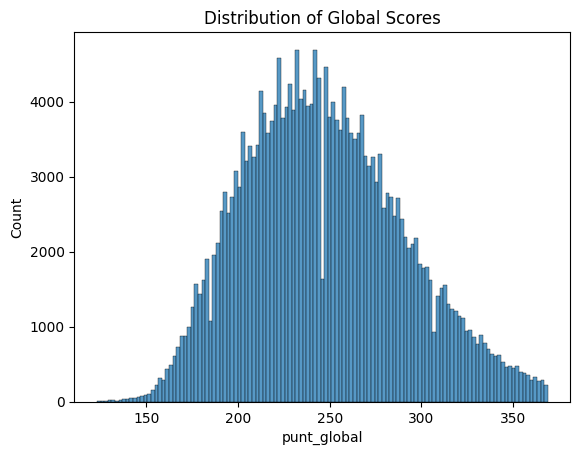

In [31]:
# Visualize distribution of a specific column
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['punt_global'])
plt.title('Distribution of Global Scores')
plt.show()



El puntaje medio de CAUCA es 236.82331890611022
El puntaje medio de CHOCO es 218.271446436015
El puntaje medio de NARIÑO es 251.4649883394128
El puntaje medio de VALLE es 251.26370638199327


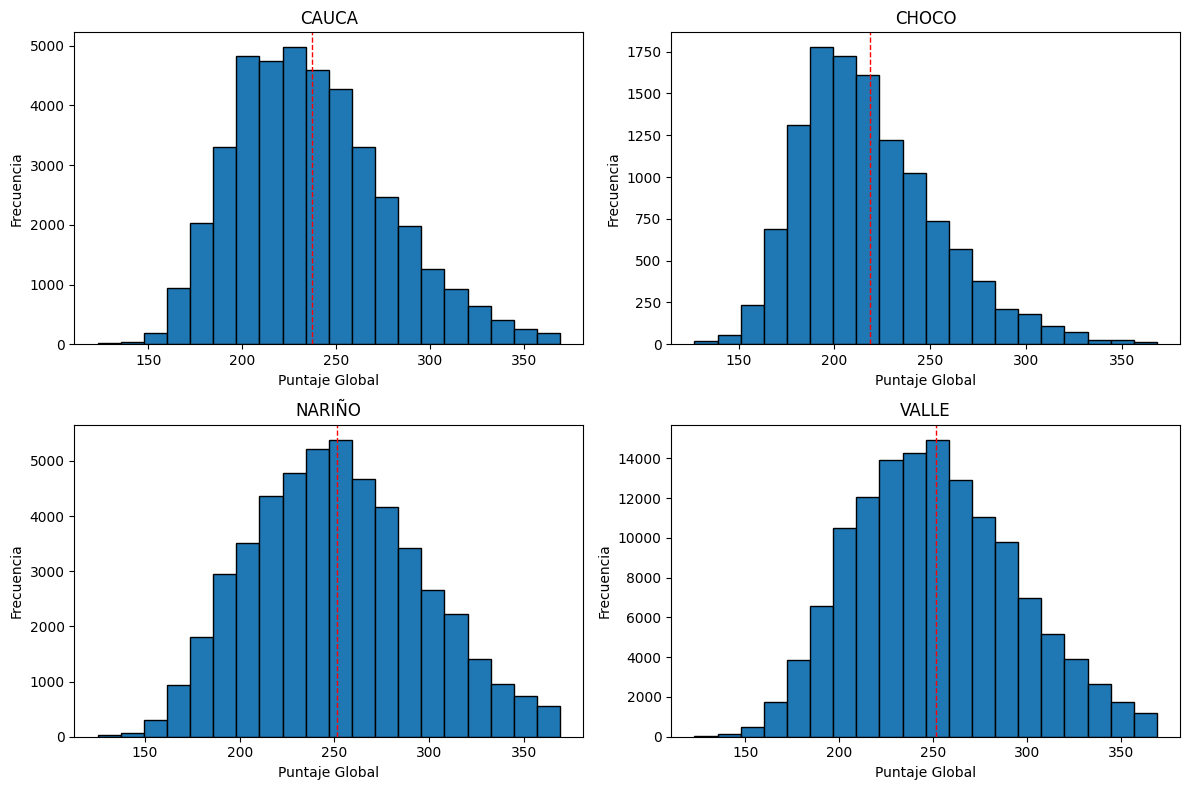

In [64]:

# Crear una columna categórica 'departamento' basada en las variables binarias
df_nuevo = df.copy()
df_nuevo['departamento'] = df_nuevo.apply(
    lambda row: 'CAUCA' if row['cole_depto_ubi_CAUCA'] == 1 else
                'CHOCO' if row['cole_depto_ubi_CHOCO'] == 1 else
                'NARIÑO' if row['cole_depto_ubi_NARIÑO'] == 1 else
                'VALLE' if row['cole_depto_ubi_VALLE'] == 1 else
                'Otros',
    axis=1
)

# Filtrar datos para los departamentos seleccionados
departamentos = ['CAUCA', 'CHOCO', 'NARIÑO', 'VALLE']
filtered_df = df_nuevo[df_nuevo['departamento'].isin(departamentos)]

# Calcular puntaje medio para cada departamento
for departamento in departamentos:
    dept_data = filtered_df[filtered_df['departamento'] == departamento]['punt_global']
    dept_mean = dept_data.mean()
    print(f'El puntaje medio de {departamento} es', dept_mean)

# Crear figura y subplots para histogramas
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Crear histogramas para cada departamento
for i, departamento in enumerate(departamentos):
    dept_data = filtered_df[filtered_df['departamento'] == departamento]['punt_global']
    ax = axs[i//2, i%2]
    ax.hist(dept_data, bins=20, edgecolor='black')
    ax.set_title(departamento)
    dept_mean = dept_data.mean()
    ax.axvline(dept_mean, color='red', linestyle='dashed', linewidth=1)
    ax.set_xlabel('Puntaje Global')
    ax.set_ylabel('Frecuencia')

# Ajustar espaciado entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


/var/folders/rk/1txw87pj7sgdsrd0ny5897580000gn/T/ipykernel_92739/1695108183.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='departamento', y='punt_global', data=filtered_df, palette='muted')


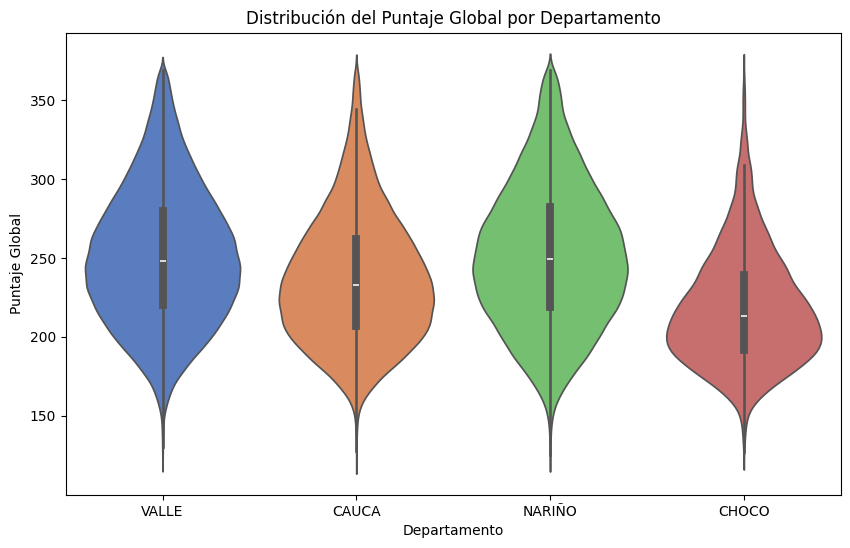

In [33]:

# Crear un diagrama de violín para la distribución del puntaje global por departamento
plt.figure(figsize=(10, 6))
sns.violinplot(x='departamento', y='punt_global', data=filtered_df, palette='muted')

# Configurar el título y las etiquetas
plt.title('Distribución del Puntaje Global por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Puntaje Global')

# Mostrar el gráfico
plt.show()


In [34]:
# Variables numéricas
numerical_vars = ['punt_ingles', 'punt_matematicas', 'punt_sociales_ciudadanas',
                  'punt_c_naturales', 'punt_lectura_critica', 'punt_global', 'edad']

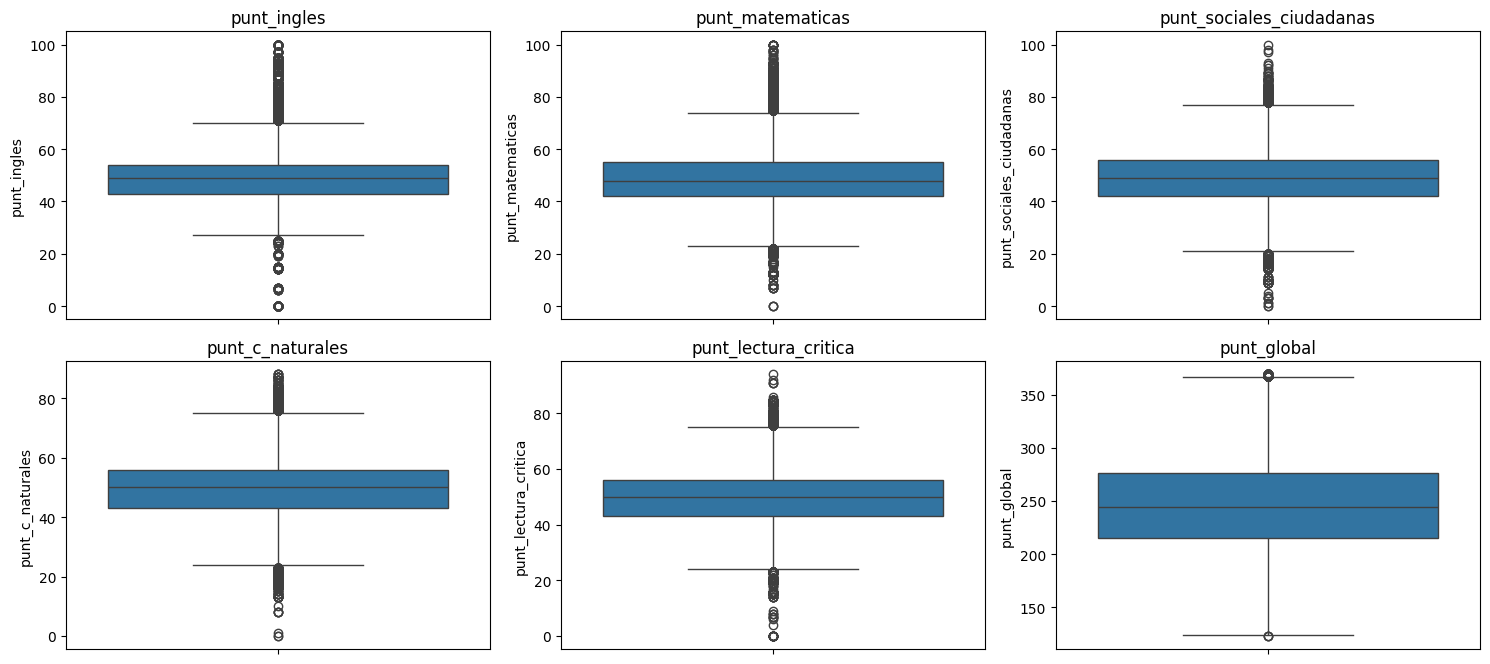

In [35]:
# Crear diagramas de caja para las variables numéricas
plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_vars[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[var])
    plt.title(var)
plt.tight_layout()
plt.show()


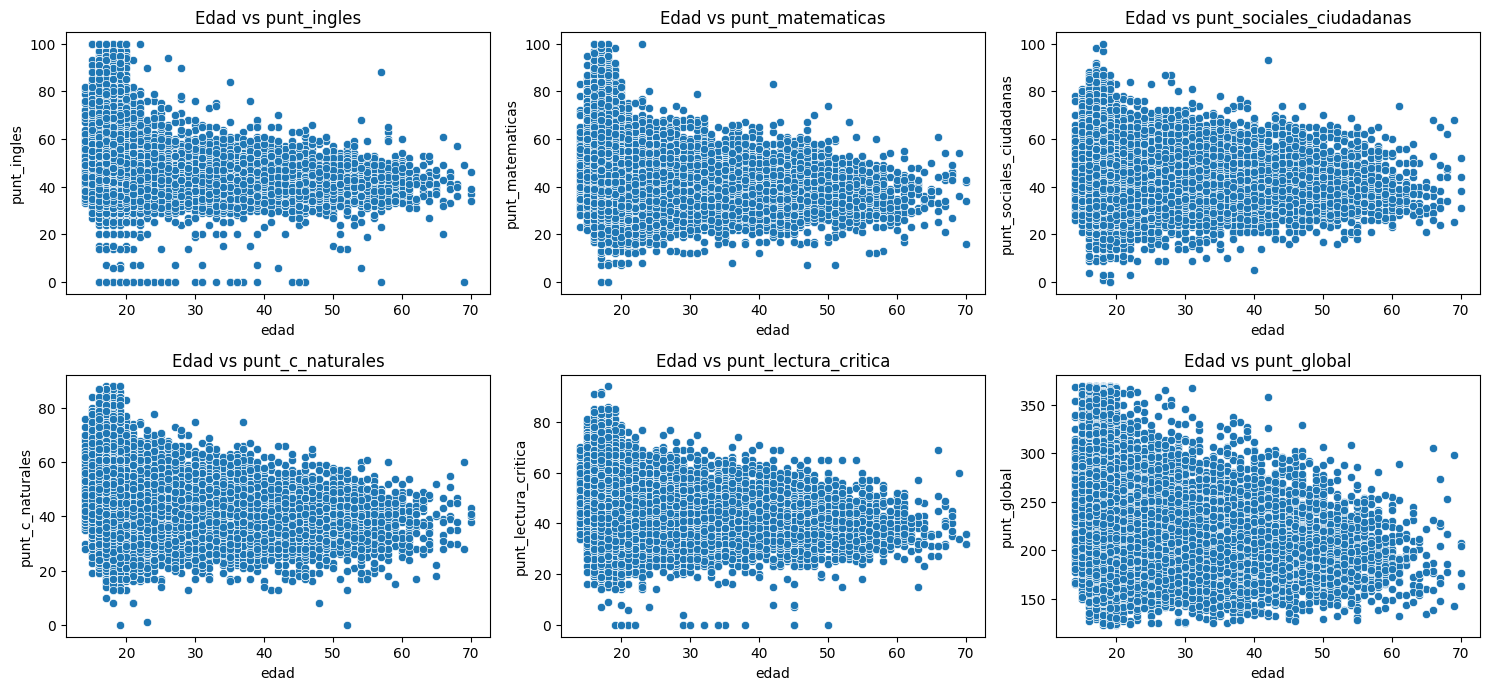

In [36]:
# Ejemplo de diagrama de dispersión entre puntajes y edad
plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_vars[:-1], 1):  # Excluye 'edad'
    plt.subplot(3, 3, i)
    sns.scatterplot(x='edad', y=var, data=df)
    plt.title(f'Edad vs {var}')
plt.tight_layout()
plt.show()


Promedio de colegios ACADEMICOS: 248.86412549344567
Promedio de colegios TECNICOS: 245.03062441512688
Promedio de colegios ACADEMICOS/TECNICOS: 246.73570223138947


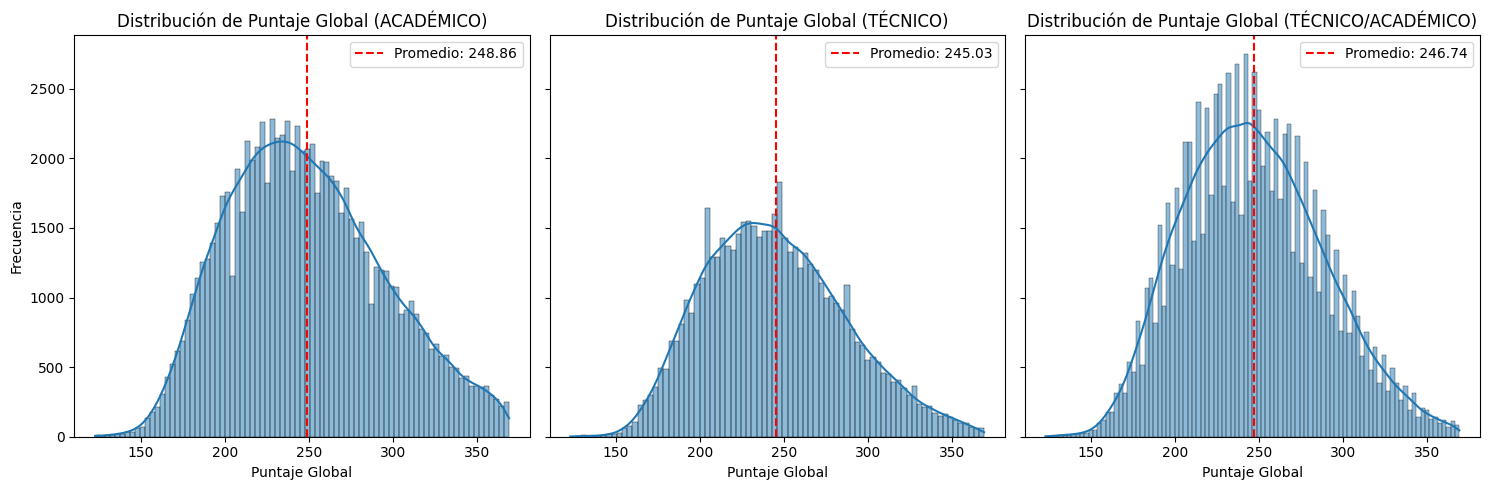

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Copiar el DataFrame original
df_nuevo = df.copy()

# Definir una función para asignar el carácter del colegio
def asignar_caracter(row):
    if row['caracter_ACADÉMICO'] == 1:
        return 'ACADÉMICO'
    elif row['caracter_TÉCNICO'] == 1:
        return 'TÉCNICO'
    elif row['caracter_TÉCNICO/ACADÉMICO'] == 1:
        return 'TÉCNICO/ACADÉMICO'
    else:
        return 'Otros'

# Aplicar la función a una nueva columna 'caracter_colegio'
df_nuevo['caracter_colegio'] = df_nuevo.apply(asignar_caracter, axis=1)

# Calcular los promedios de puntaje global para cada tipo de colegio
promedio_academico = df_nuevo[df_nuevo['caracter_colegio'] == 'ACADÉMICO']['punt_global'].mean()
promedio_tecnico = df_nuevo[df_nuevo['caracter_colegio'] == 'TÉCNICO']['punt_global'].mean()
promedio_tecnico_academico = df_nuevo[df_nuevo['caracter_colegio'] == 'TÉCNICO/ACADÉMICO']['punt_global'].mean()
print(f'Promedio de colegios ACADEMICOS:',promedio_academico)
print(f'Promedio de colegios TECNICOS:',promedio_tecnico)
print(f'Promedio de colegios ACADEMICOS/TECNICOS:',promedio_tecnico_academico)


# Crear subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Generar distribución de puntaje global para cada tipo de colegio
for i, caracter in enumerate(['ACADÉMICO', 'TÉCNICO', 'TÉCNICO/ACADÉMICO']):
    # Histograma
    sns.histplot(data=df_nuevo[df_nuevo['caracter_colegio'] == caracter], x='punt_global', ax=axs[i], kde=True)
    axs[i].set_title(f'Distribución de Puntaje Global ({caracter})')
    axs[i].set_xlabel('Puntaje Global')
    axs[i].set_ylabel('Frecuencia')
    
    # Línea vertical para el promedio
    if caracter == 'ACADÉMICO':
        axs[i].axvline(promedio_academico, color='r', linestyle='--', label=f'Promedio: {promedio_academico:.2f}')
    elif caracter == 'TÉCNICO':
        axs[i].axvline(promedio_tecnico, color='r', linestyle='--', label=f'Promedio: {promedio_tecnico:.2f}')
    else:
        axs[i].axvline(promedio_tecnico_academico, color='r', linestyle='--', label=f'Promedio: {promedio_tecnico_academico:.2f}')
    
    axs[i].legend()

# Ajustar espaciado
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [52]:
from scipy.stats import f_oneway

# Filtrar los puntajes globales para cada tipo de colegio
puntajes_academico = df_nuevo[df_nuevo['caracter_colegio'] == 'ACADÉMICO']['punt_global']
puntajes_tecnico = df_nuevo[df_nuevo['caracter_colegio'] == 'TÉCNICO']['punt_global']
puntajes_tecnico_academico = df_nuevo[df_nuevo['caracter_colegio'] == 'TÉCNICO/ACADÉMICO']['punt_global']

# Realizar ANOVA
f_statistic, p_value = f_oneway(puntajes_academico, puntajes_tecnico, puntajes_tecnico_academico)

# Imprimir resultados
print("Resultados del ANOVA:")
print(f"F-Statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Interpretar el resultado
if p_value < 0.05:
    print("Hay diferencias significativas entre al menos dos grupos.")
else:
    print("No hay diferencias significativas entre los grupos.")


Resultados del ANOVA:
F-Statistic: 137.23660818160107
P-value: 2.712246582959744e-60
Hay diferencias significativas entre al menos dos grupos.


In [51]:
from scipy.stats import ttest_ind

# Filtrar los puntajes globales para los colegios de carácter "ACADÉMICO" y "TÉCNICO"
puntajes_academico = df_nuevo[df_nuevo['caracter_colegio'] == 'ACADÉMICO']['punt_global']
puntajes_tecnico = df_nuevo[df_nuevo['caracter_colegio'] == 'TÉCNICO']['punt_global']

# Realizar la prueba t de Student independiente
t_statistic, p_value = ttest_ind(puntajes_academico, puntajes_tecnico)

# Imprimir resultados
print("Resultados de la prueba t de Student independiente:")
print(f"T-Statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpretar el resultado
if p_value < 0.05:
    print("Hay una diferencia significativa entre los puntajes globales de colegios de carácter ACADÉMICO y TÉCNICO.")
else:
    print("No hay una diferencia significativa entre los puntajes globales de colegios de carácter ACADÉMICO y TÉCNICO.")


Resultados de la prueba t de Student independiente:
T-Statistic: 15.705922195685737
P-value: 1.5352297016118036e-55
Hay una diferencia significativa entre los puntajes globales de colegios de carácter ACADÉMICO y TÉCNICO.


## Naturaleza

In [57]:
from scipy.stats import ttest_ind

# Filtrar los puntajes globales para los colegios Oficiales y no Oficiales
puntajes_oficiales = df_nuevo[df_nuevo['cole_naturaleza'] == 1]['punt_global']
puntajes_no_oficiales = df_nuevo[df_nuevo['cole_naturaleza'] == 0]['punt_global']

# Realizar la prueba t de Student independiente
t_statistic, p_value = ttest_ind(puntajes_oficiales, puntajes_no_oficiales)

# Imprimir resultados
print("Resultados de la prueba t de Student independiente:")
print(f"T-Statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpretar el resultado
if p_value < 0.05:
    print("Hay una diferencia significativa entre los puntajes globales de colegios Oficiales y no Oficiales.")
else:
    print("No hay una diferencia significativa entre los puntajes globales de colegios Oficiales y no Oficiales.")
    
# Calcular promedios de puntajes globales por naturaleza del colegio
promedio_oficial = df_nuevo[df_nuevo['cole_naturaleza'] == 1]['punt_global'].mean()
promedio_no_oficial = df_nuevo[df_nuevo['cole_naturaleza'] == 0]['punt_global'].mean()

# Imprimir resultados
print("Promedio de puntajes globales por naturaleza del colegio:")
print(f"Oficial: {promedio_oficial:.2f}")
print(f"No Oficial: {promedio_no_oficial:.2f}")


Resultados de la prueba t de Student independiente:
T-Statistic: -61.37407727242415
P-value: 0.0
Hay una diferencia significativa entre los puntajes globales de colegios Oficiales y no Oficiales.
Promedio de puntajes globales por naturaleza del colegio:
Oficial: 244.25
No Oficial: 257.35


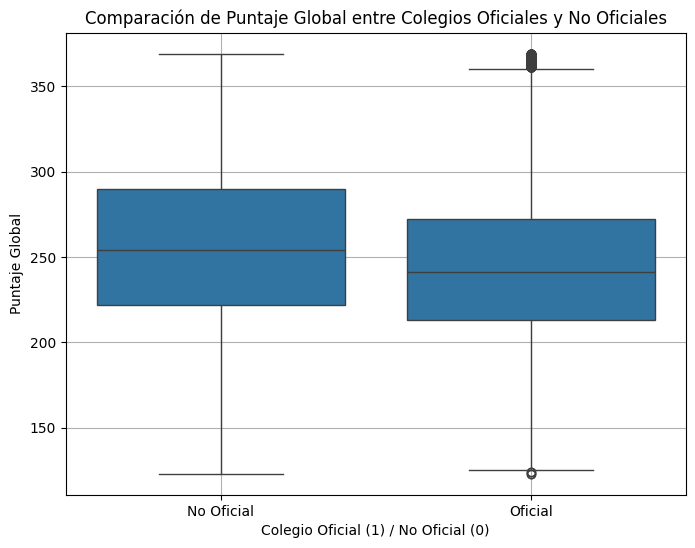

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un boxplot para comparar los puntajes globales entre colegios oficiales y no oficiales
plt.figure(figsize=(8, 6))
sns.boxplot(x='cole_naturaleza', y='punt_global', data=df_nuevo)
plt.xlabel('Colegio Oficial (1) / No Oficial (0)')
plt.ylabel('Puntaje Global')
plt.title('Comparación de Puntaje Global entre Colegios Oficiales y No Oficiales')
plt.xticks(ticks=[0, 1], labels=['No Oficial', 'Oficial'])
plt.grid(True)
plt.show()


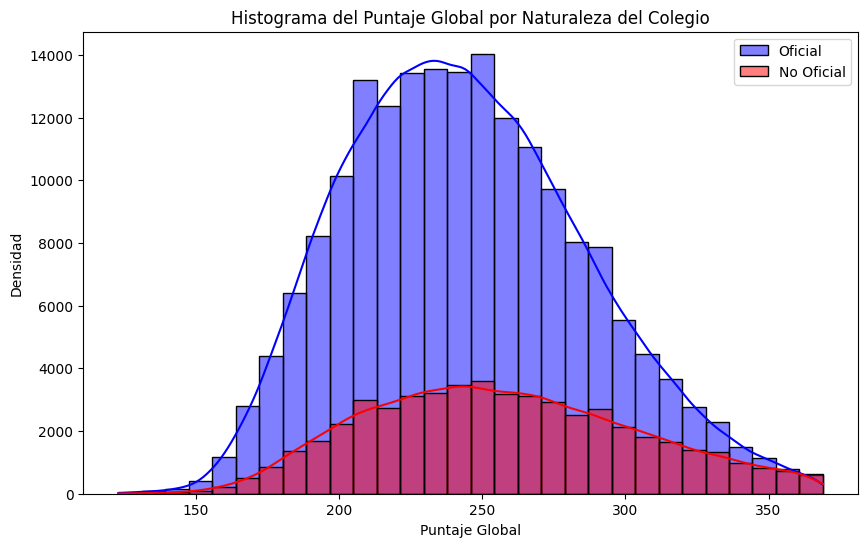

In [60]:
import seaborn as sns

# Crear histogramas con KDE
plt.figure(figsize=(10, 6))
sns.histplot(puntajes_oficiales, bins=30, kde=True, color='blue', label='Oficial')
sns.histplot(puntajes_no_oficiales, bins=30, kde=True, color='red', label='No Oficial')
plt.xlabel('Puntaje Global')
plt.ylabel('Densidad')
plt.title('Histograma del Puntaje Global por Naturaleza del Colegio')
plt.legend()
plt.grid(False)
plt.show()


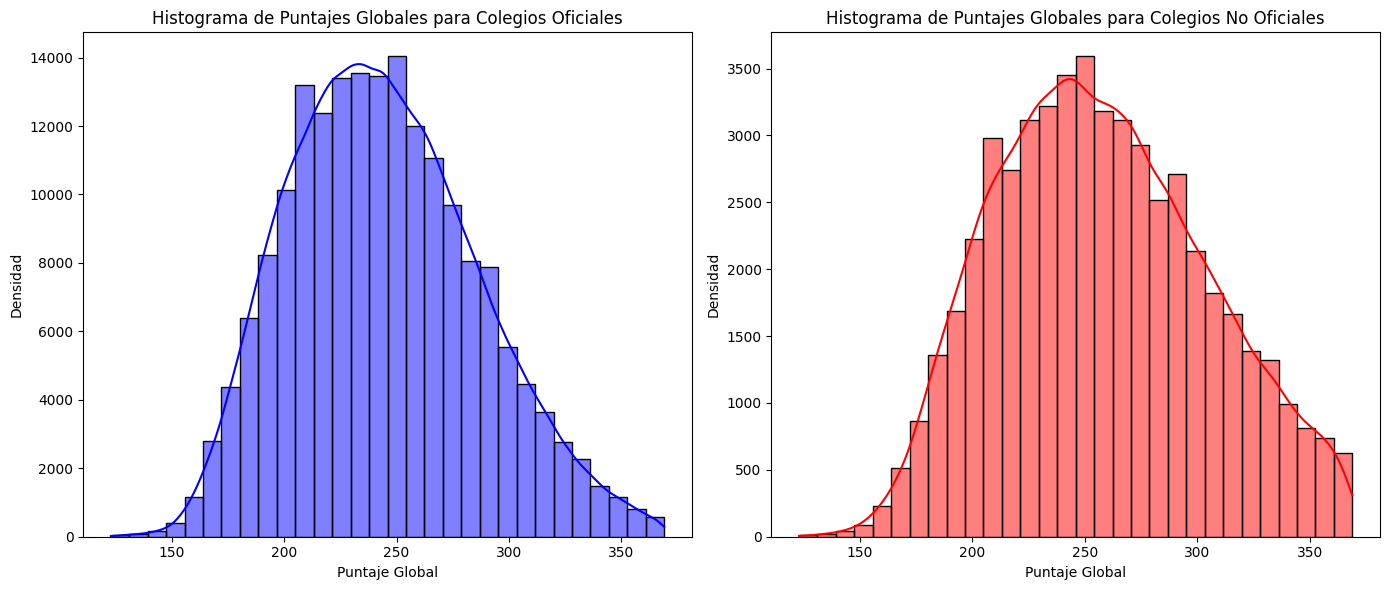

In [61]:
# Crear subplots para los histogramas individuales
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Histograma para colegios oficiales
sns.histplot(puntajes_oficiales, bins=30, kde=True, color='blue', ax=axs[0])
axs[0].set_xlabel('Puntaje Global')
axs[0].set_ylabel('Densidad')
axs[0].set_title('Histograma de Puntajes Globales para Colegios Oficiales')

# Histograma para colegios no oficiales
sns.histplot(puntajes_no_oficiales, bins=30, kde=True, color='red', ax=axs[1])
axs[1].set_xlabel('Puntaje Global')
axs[1].set_ylabel('Densidad')
axs[1].set_title('Histograma de Puntajes Globales para Colegios No Oficiales')

# Ajustar espaciado
plt.tight_layout()
plt.show()


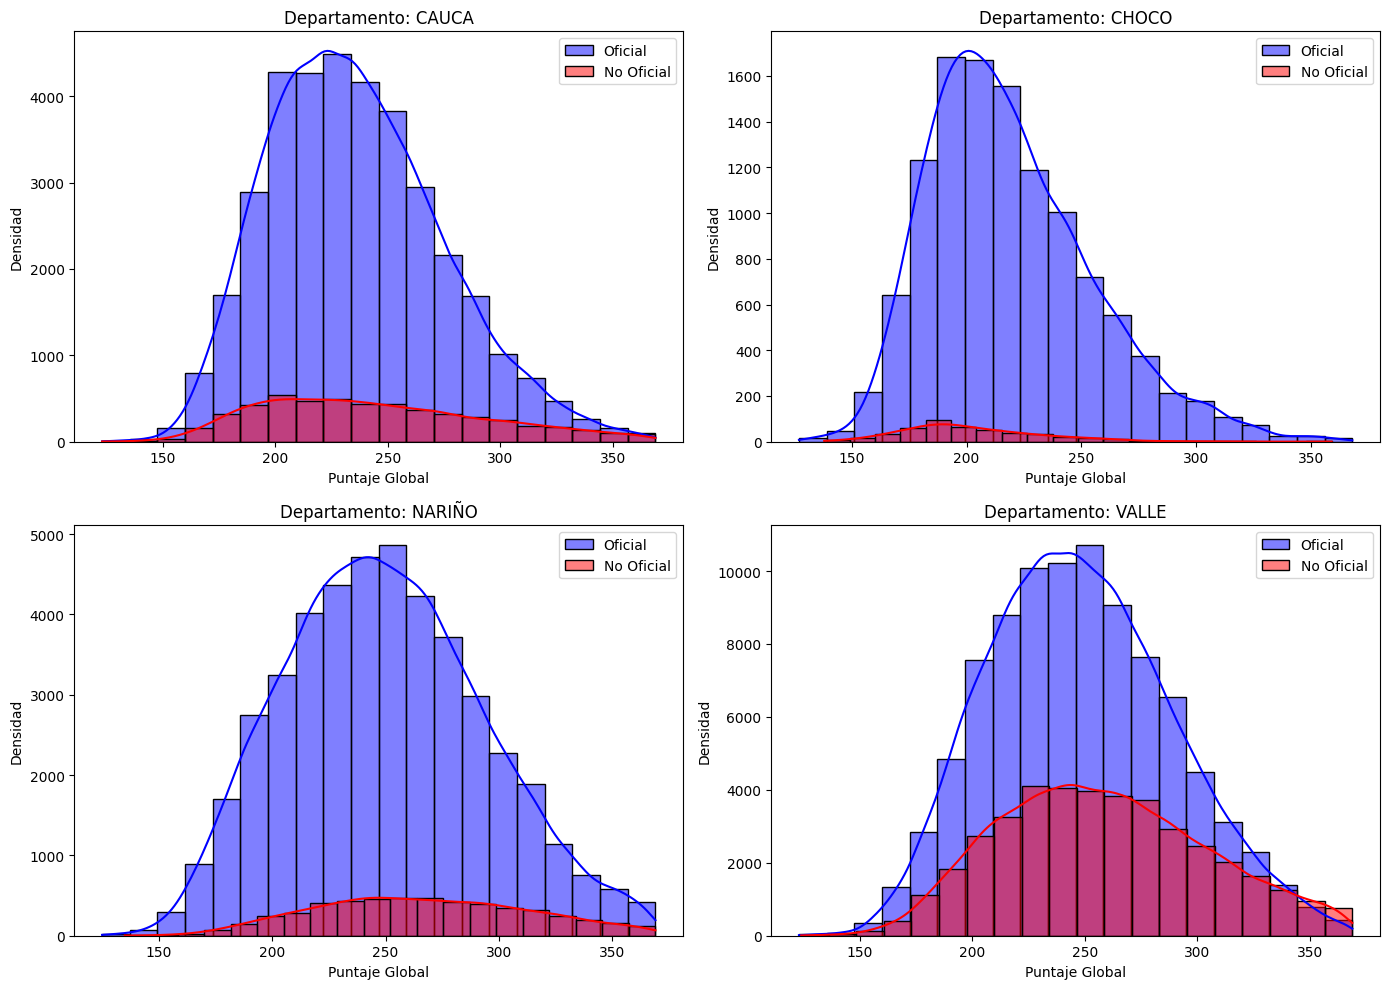

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Filtrar y plotear datos para cada departamento
for i, depto in enumerate(['CAUCA', 'CHOCO', 'NARIÑO', 'VALLE']):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    
    # Filtrar puntajes globales para colegios oficiales y no oficiales en el departamento actual
    puntajes_oficiales = df_nuevo[(df_nuevo['departamento'] == depto) & (df_nuevo['cole_naturaleza'] == 1)]['punt_global']
    puntajes_no_oficiales = df_nuevo[(df_nuevo['departamento'] == depto) & (df_nuevo['cole_naturaleza'] == 0)]['punt_global']
    
    # Plotear histogramas para puntajes globales de colegios oficiales y no oficiales en el departamento actual
    sns.histplot(puntajes_oficiales, bins=20, kde=True, color='blue', label='Oficial', ax=ax)
    sns.histplot(puntajes_no_oficiales, bins=20, kde=True, color='red', label='No Oficial', ax=ax)
    
    # Configuraciones del subplot
    ax.set_title(f'Departamento: {depto}')
    ax.set_xlabel('Puntaje Global')
    ax.set_ylabel('Densidad')
    ax.legend()

# Ajustar espaciado
plt.tight_layout()
plt.show()


## Correlacion

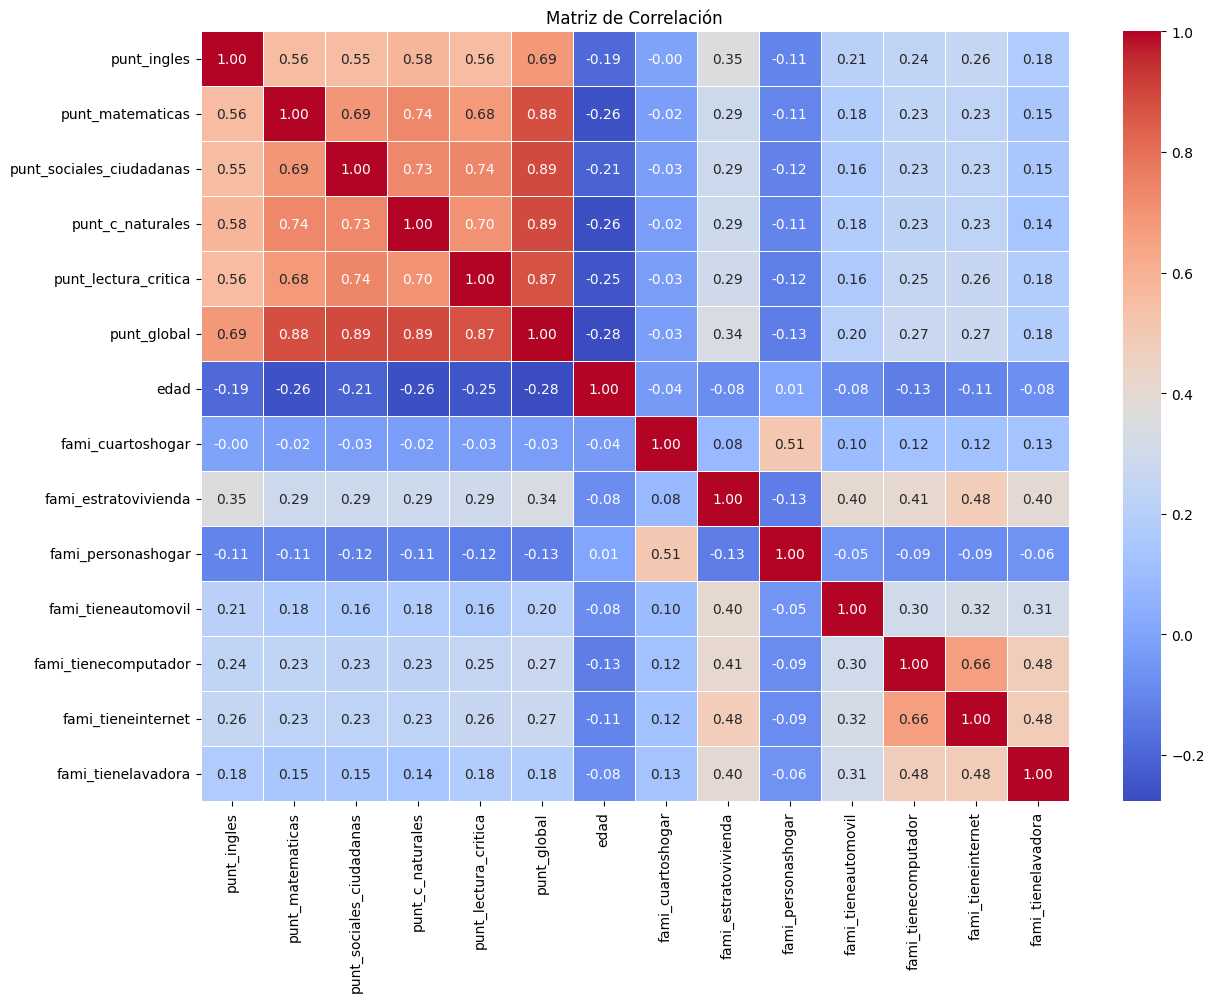

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Seleccionar las variables de interés para la matriz de correlación
variables_interes = ['punt_ingles', 'punt_matematicas', 'punt_sociales_ciudadanas',
                     'punt_c_naturales', 'punt_lectura_critica', 'punt_global', 'edad',
                     'fami_cuartoshogar', 'fami_estratovivienda', 'fami_personashogar',
                     'fami_tieneautomovil', 'fami_tienecomputador', 'fami_tieneinternet', 'fami_tienelavadora']

# Filtrar el DataFrame para incluir solo las variables seleccionadas
df_interes = df[variables_interes]

# Calcular la matriz de correlación
correlation_matrix = df_interes.corr()

# Crear un heatmap con la matriz de correlación
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Configurar el título y mostrar la gráfica
plt.title('Matriz de Correlación')
plt.show()
